<a href="https://colab.research.google.com/github/Asm3515/EDA_of_Airbnb_In_WashingtonDC/blob/main/Airbnb_In_Washington.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task #1: Read Data**

In [5]:
import pandas as pd
import numpy as np

price = pd.read_csv("/content/Airbnb_ Price_Data.csv")
price.head()  #used to check if the data was loaded
#The Data is Retrived and loaded in pandas DataFarme easily
#Lets remove default index from the dataset


,0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,4.5,8,4,2.5,250,46:14.7,47.610819,-122.290816,0101000020E6100000D449B6BA9C925EC0416326512FCE4740,"Casa Madrona - Urban Oasis, 1 block from the Park!"
0,1,3335,4193,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2.0,1.0,100,08:45.3,47.529846,-122.275840,0101000020E61000006FBBD05CA7915EC04DF564FED1C3...,Sweet Seattle Urban Homestead 2 Bdr
1,2,4291,35749,Private room,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82,04:19.9,47.687801,-122.313427,0101000020E6100000BDAB1E300F945EC0FB93F8DC09D8...,Sunrise in Seattle Master Suite
2,3,5682,8993,Entire home/apt,"Seattle, WA, United States",462,5.0,2,NaN,1.0,49,11:25.5,47.523980,-122.359891,0101000020E6100000FCC7427408975EC009E1D1C611C3...,"Cozy Studio, min. to downtown -WiFi"
3,4,6606,14942,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,12:38.4,47.654109,-122.337605,0101000020E6100000D47D00529B955EC07782FDD7B9D3...,"Fab, private seattle urban cottage!"
4,5,9419,30559,Private room,"Seattle, WA, United States",130,4.5,2,1.0,3.0,65,08:20.1,47.550167,-122.319366,0101000020E6100000145D177E70945EC0522B4CDF6BC6...,Glorious sun room w/ memory foambed


# **Task #2: Review Data**

In [6]:
price.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   0                                                   498 non-null    int64  
 1   2318                                                498 non-null    int64  
 2   2536                                                498 non-null    int64  
 3   Entire home/apt                                     498 non-null    object 
 4   Seattle, WA, United States                          498 non-null    object 
 5   21                                                  498 non-null    int64  
 6   4.5                                                 479 non-null    float64
 7   8                                                   498 non-null    int64  
 8   4                                                   411 non-null    float64
 9  

# **Task #3: Adding Heading**

In [7]:
price.columns = ['ID', 'Room ID', 'Host ID', 'Room Type', 'Address (City, State, Country)', 'Reviews',
              'Overall satisfaction', 'Accommodates', 'Bedrooms', 'Bathrooms', 'Price', 'Last modified',
              'Latitude', 'Longitude', 'Location', 'Name']

#price.head()  #to check if data has the given column names
# Removing Default indexing of the Pandas
#price.reindex(index=None)
price.head()


,ID,Room ID,Host ID,Room Type,"Address (City, State, Country)",Reviews,Overall satisfaction,Accommodates,Bedrooms,Bathrooms,Price,Last modified,Latitude,Longitude,Location,Name
0,1,3335,4193,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2.0,1.0,100,08:45.3,47.529846,-122.275840,0101000020E61000006FBBD05CA7915EC04DF564FED1C3...,Sweet Seattle Urban Homestead 2 Bdr
1,2,4291,35749,Private room,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82,04:19.9,47.687801,-122.313427,0101000020E6100000BDAB1E300F945EC0FB93F8DC09D8...,Sunrise in Seattle Master Suite
2,3,5682,8993,Entire home/apt,"Seattle, WA, United States",462,5.0,2,NaN,1.0,49,11:25.5,47.523980,-122.359891,0101000020E6100000FCC7427408975EC009E1D1C611C3...,"Cozy Studio, min. to downtown -WiFi"
3,4,6606,14942,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,12:38.4,47.654109,-122.337605,0101000020E6100000D47D00529B955EC07782FDD7B9D3...,"Fab, private seattle urban cottage!"
4,5,9419,30559,Private room,"Seattle, WA, United States",130,4.5,2,1.0,3.0,65,08:20.1,47.550167,-122.319366,0101000020E6100000145D177E70945EC0522B4CDF6BC6...,Glorious sun room w/ memory foambed


# **Task #4: Handling Missing Values**

In [17]:
# Calculating Missing Values and Its Percentage in the Data
percent_missing = price.isnull().sum() * 100 / len(price)
missing_value_df = pd.DataFrame({'column_name': price.columns,
                                 'percent_missing': percent_missing})
# Remove columns with 0% missing values
greater_10 = missing_value_df[missing_value_df['percent_missing'] >= 10.00]

print(greater_10)

         column_name  percent_missing
Bedrooms    Bedrooms         17.46988


In [18]:
less_10 = missing_value_df[missing_value_df['percent_missing'] < 10]

print(less_10)

                                                   column_name  \
ID                                                          ID   
Room ID                                                Room ID   
Host ID                                                Host ID   
Room Type                                            Room Type   
Address (City, State, Country)  Address (City, State, Country)   
Reviews                                                Reviews   
Overall satisfaction                      Overall satisfaction   
Accommodates                                      Accommodates   
Bathrooms                                            Bathrooms   
Price                                                    Price   
Last modified                                    Last modified   
Latitude                                              Latitude   
Longitude                                            Longitude   
Location                                              Location   
Name      

In [28]:
# We will use median to fill the Na Values in Overall Statisfaction
median_Statisfaction = price["Overall satisfaction"].median()
print(median_Statisfaction)

price["Overall satisfaction"].fillna(median_Statisfaction, inplace=True)

print(price.head())

5.0
   ID  Room ID  Host ID        Room Type Address (City, State, Country)  \
0   1     3335     4193  Entire home/apt     Seattle, WA, United States   
1   2     4291    35749     Private room     Seattle, WA, United States   
2   3     5682     8993  Entire home/apt     Seattle, WA, United States   
3   4     6606    14942  Entire home/apt     Seattle, WA, United States   
4   5     9419    30559     Private room     Seattle, WA, United States   

   Reviews  Overall satisfaction  Accommodates  Bedrooms  Bathrooms  Price  \
0        1                   5.0             4       2.0        1.0    100   
1       63                   4.5             2       1.0        1.0     82   
2      462                   5.0             2       NaN        1.0     49   
3      134                   4.5             2       1.0        1.0     90   
4      130                   4.5             2       1.0        3.0     65   

  Last modified   Latitude   Longitude  \
0       08:45.3  47.529846 -122.27

In [32]:
# We will use median to fill the Na Values in
median_Bedroom = price["Bedrooms"].median()
print(median_Statisfaction)

price["Bedrooms"].fillna(median_Bedroom, inplace=True)

print(price.head())


# We will do same for Bathroom
median_Bathroom = price["Bathrooms"].median()
print(median_Statisfaction)

price["Bathrooms"].fillna(median_Bathroom, inplace=True)

print(price.head())

5.0
   ID  Room ID  Host ID        Room Type Address (City, State, Country)  \
0   1     3335     4193  Entire home/apt     Seattle, WA, United States   
1   2     4291    35749     Private room     Seattle, WA, United States   
2   3     5682     8993  Entire home/apt     Seattle, WA, United States   
3   4     6606    14942  Entire home/apt     Seattle, WA, United States   
4   5     9419    30559     Private room     Seattle, WA, United States   

   Reviews  Overall satisfaction  Accommodates  Bedrooms  Bathrooms  Price  \
0        1                   5.0             4       2.0        1.0    100   
1       63                   4.5             2       1.0        1.0     82   
2      462                   5.0             2       1.0        1.0     49   
3      134                   4.5             2       1.0        1.0     90   
4      130                   4.5             2       1.0        3.0     65   

  Last modified   Latitude   Longitude  \
0       08:45.3  47.529846 -122.27

In [33]:
# Calculating Missing Values and Its Percentage in the Data
percent_missing = price.isnull().sum() * 100 / len(price)
missing_value_df = pd.DataFrame({'column_name': price.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

                                                   column_name  \
ID                                                          ID   
Room ID                                                Room ID   
Host ID                                                Host ID   
Room Type                                            Room Type   
Address (City, State, Country)  Address (City, State, Country)   
Reviews                                                Reviews   
Overall satisfaction                      Overall satisfaction   
Accommodates                                      Accommodates   
Bedrooms                                              Bedrooms   
Bathrooms                                            Bathrooms   
Price                                                    Price   
Last modified                                    Last modified   
Latitude                                              Latitude   
Longitude                                            Longitude   
Location  

# **Task #5: Prelimenary Data Analysis**

###### **Task #5.a&b: Calculate Ave Price and Enumerate Room type**

In [41]:
#Calculate ave price

Average_Price = price["Price"].mean()
print(f"The Average Price is",Average_Price)

#Enumerate room types

Unique_Room_Type = price["Room Type"].unique()
print(Unique_Room_Type)  # Done to get the unique values of the Room Type
# Define the mapping dictionary
room_type_mapping = {'Entire home/apt': 1, 'Private room': 2, 'Shared room': 3}

# Replace the values in the 'Room Type' column
price['Room Type'] = price['Room Type'].replace(room_type_mapping)

price.head()

The Average Price is 128.54618473895582
[1 2 3]


,ID,Room ID,Host ID,Room Type,"Address (City, State, Country)",Reviews,Overall satisfaction,Accommodates,Bedrooms,Bathrooms,Price,Last modified,Latitude,Longitude,Location,Name
0,1,3335,4193,1,"Seattle, WA, United States",1,5.0,4,2.0,1.0,100,08:45.3,47.529846,-122.275840,0101000020E61000006FBBD05CA7915EC04DF564FED1C3...,Sweet Seattle Urban Homestead 2 Bdr
1,2,4291,35749,2,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82,04:19.9,47.687801,-122.313427,0101000020E6100000BDAB1E300F945EC0FB93F8DC09D8...,Sunrise in Seattle Master Suite
2,3,5682,8993,1,"Seattle, WA, United States",462,5.0,2,1.0,1.0,49,11:25.5,47.523980,-122.359891,0101000020E6100000FCC7427408975EC009E1D1C611C3...,"Cozy Studio, min. to downtown -WiFi"
3,4,6606,14942,1,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,12:38.4,47.654109,-122.337605,0101000020E6100000D47D00529B955EC07782FDD7B9D3...,"Fab, private seattle urban cottage!"
4,5,9419,30559,2,"Seattle, WA, United States",130,4.5,2,1.0,3.0,65,08:20.1,47.550167,-122.319366,0101000020E6100000145D177E70945EC0522B4CDF6BC6...,Glorious sun room w/ memory foambed


###### **Task #5.c: Price for room types**

In [44]:
#Price for room types
Prices_per_Room_Type = []

for i in range(1, 4):
    # Filter rows where 'Room Type' matches i
    room_type_prices = price.loc[price['Room Type'] == i, 'Price']

    # Calculate the mean price for the current room type
    mean_price = room_type_prices.mean()

    # Append the mean price to the list
    Prices_per_Room_Type.append(mean_price)

print("Average Price for Each Room Type:", Prices_per_Room_Type)


Average Price for Each Room Type: [159.7807807807808, 65.33962264150944, 70.0]


###### **Task #5.d: Reviews >= 4.0**

In [46]:
#Reviews >= 4.0

Review_Greaterthanfour = price[price['Reviews'] >= 4.0]
print(Review_Greaterthanfour)

      ID  Room ID  Host ID  Room Type Address (City, State, Country)  Reviews  \
1      2     4291    35749          2     Seattle, WA, United States       63   
2      3     5682     8993          1     Seattle, WA, United States      462   
3      4     6606    14942          1     Seattle, WA, United States      134   
4      5     9419    30559          2     Seattle, WA, United States      130   
5      6     9460    30832          2     Seattle, WA, United States      401   
..   ...      ...      ...        ...                            ...      ...   
493  518  2578855  5507715          1     Seattle, WA, United States      259   
494  519  2585090  1560318          2    Kirkland, WA, United States       10   
495  520  2586350  2536735          1     Seattle, WA, United States      142   
496  521  2586642  1452570          1     Seattle, WA, United States       62   
497  522  2593176  8932486          2     Seattle, WA, United States      218   

     Overall satisfaction  

###### **Task #5.d: Reviews >= 4 per room types**

In [60]:
#Reviews >= 4 per room types

Type_1_Reviews = Review_Greaterthanfour[Review_Greaterthanfour["Room Type"] == 1]
Type_1_Reviews.info()
print('\n')

Type_2_Reviews = Review_Greaterthanfour[Review_Greaterthanfour["Room Type"] == 2]
Type_2_Reviews.info()
print('\n')

Type_3_Reviews = Review_Greaterthanfour[Review_Greaterthanfour["Room Type"] == 3]
Type_3_Reviews.info()
print('\n')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 2 to 496
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              315 non-null    int64  
 1   Room ID                         315 non-null    int64  
 2   Host ID                         315 non-null    int64  
 3   Room Type                       315 non-null    int64  
 4   Address (City, State, Country)  315 non-null    object 
 5   Reviews                         315 non-null    int64  
 6   Overall satisfaction            315 non-null    float64
 7   Accommodates                    315 non-null    int64  
 8   Bedrooms                        315 non-null    float64
 9   Bathrooms                       315 non-null    float64
 10  Price                           315 non-null    int64  
 11  Last modified                   315 non-null    object 
 12  Latitude                        315 

###### **Task #5.e: Segment and save city name**

In [61]:
#Segment and save city name

price['City'] = price['Address (City, State, Country)'].str.split(',').str[0]
print(price['City'].unique(),"\n")
price.head()

['Seattle' 'Kirkland' 'Bellevue' 'Redmond' 'Mercer Island' 'Renton'
 'Ballard'] 



,ID,Room ID,Host ID,Room Type,"Address (City, State, Country)",Reviews,Overall satisfaction,Accommodates,Bedrooms,Bathrooms,Price,Last modified,Latitude,Longitude,Location,Name,City
0,1,3335,4193,1,"Seattle, WA, United States",1,5.0,4,2.0,1.0,100,08:45.3,47.529846,-122.275840,0101000020E61000006FBBD05CA7915EC04DF564FED1C3...,Sweet Seattle Urban Homestead 2 Bdr,Seattle
1,2,4291,35749,2,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82,04:19.9,47.687801,-122.313427,0101000020E6100000BDAB1E300F945EC0FB93F8DC09D8...,Sunrise in Seattle Master Suite,Seattle
2,3,5682,8993,1,"Seattle, WA, United States",462,5.0,2,1.0,1.0,49,11:25.5,47.523980,-122.359891,0101000020E6100000FCC7427408975EC009E1D1C611C3...,"Cozy Studio, min. to downtown -WiFi",Seattle
3,4,6606,14942,1,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,12:38.4,47.654109,-122.337605,0101000020E6100000D47D00529B955EC07782FDD7B9D3...,"Fab, private seattle urban cottage!",Seattle
4,5,9419,30559,2,"Seattle, WA, United States",130,4.5,2,1.0,3.0,65,08:20.1,47.550167,-122.319366,0101000020E6100000145D177E70945EC0522B4CDF6BC6...,Glorious sun room w/ memory foambed,Seattle


###### **Task #5.f: Ave rental price per city**

In [62]:
#Ave rental price per city
average_price_per_city = price.groupby('City')['Price'].mean()

# Print the average
print(average_price_per_city)


City
Ballard            75.000000
Bellevue           96.600000
Kirkland          105.777778
Mercer Island    1702.750000
Redmond            52.466667
Renton             60.000000
Seattle           118.700873
Name: Price, dtype: float64


###### **Task #5.g: Satisfaction per city**

In [63]:
#Satisfaction per city
Statisfaction_per_City = price.groupby('City')['Overall satisfaction'].mean()

# Print the average
print(Statisfaction_per_City)

City
Ballard          5.000000
Bellevue         4.550000
Kirkland         4.777778
Mercer Island    4.875000
Redmond          4.666667
Renton           5.000000
Seattle          4.784934
Name: Overall satisfaction, dtype: float64


# **Task #6: Visualization**



###### **Task #6.a: Barplot Bedroom vs Price**

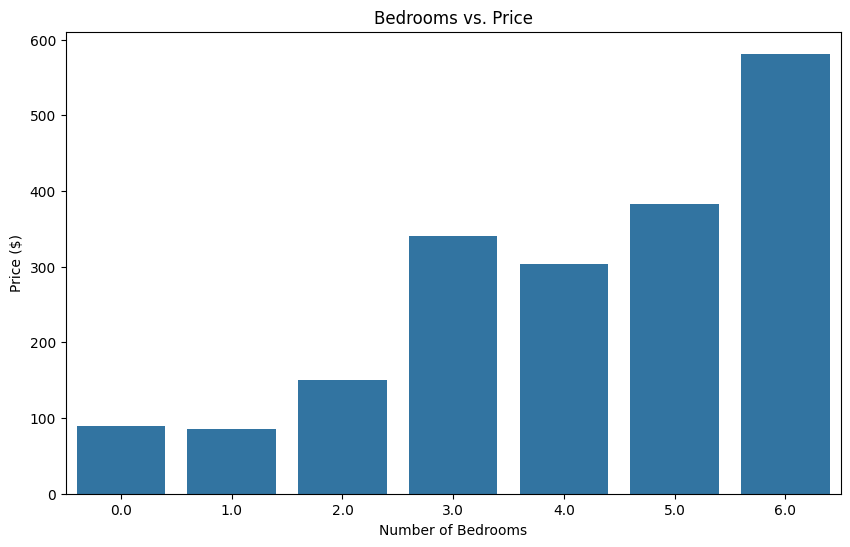

In [92]:
# Code to Generate Bar Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=price, x='Bedrooms', y='Price',errorbar=None)
plt.title('Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.show()


###### **Task #6.b: Lineplot Accomodation Vs Price**

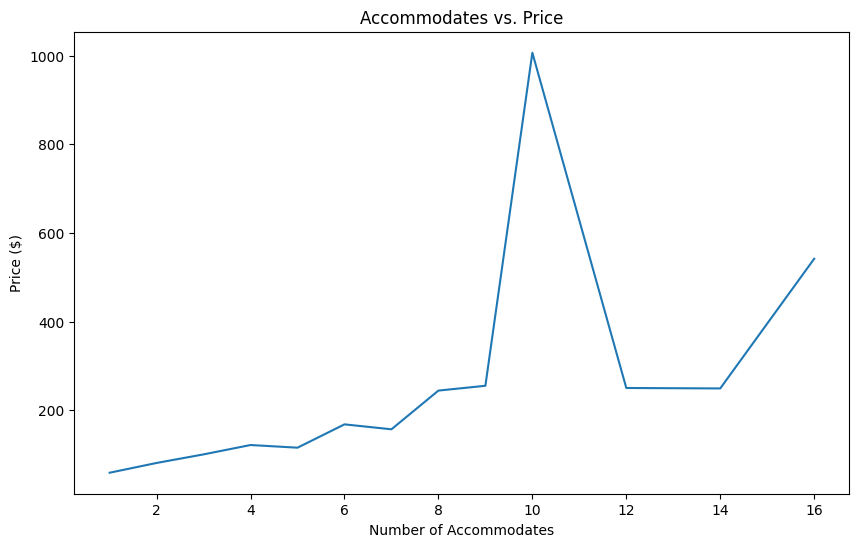

In [93]:
# Code to Generate Line Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=price, x='Accommodates', y='Price',errorbar=None)
plt.title('Accommodates vs. Price')
plt.xlabel('Number of Accommodates')
plt.ylabel('Price ($)')
# plt.fill_between(price['Accommodates'], price['Price'], color='skyblue', alpha=0.3)
plt.show()

###### **Task #6.c: Barplot Room types vs. price**

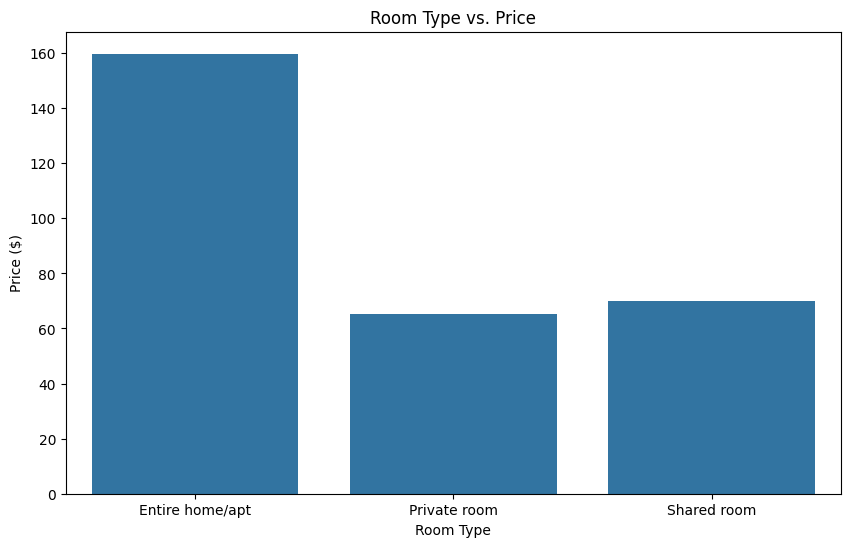

In [100]:
room_type_mapping = {1: 'Entire home/apt', 2: 'Private room', 3: 'Shared room'}
plt.figure(figsize=(10, 6))
sns.barplot(data=price, x='Room Type', y='Price',errorbar=None)
plt.title('Room Type vs. Price')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.xticks(ticks=[0, 1, 2], labels=[room_type_mapping[1], room_type_mapping[2], room_type_mapping[3]])  # to Rename the Types back once they are plotted
plt.show()

###### **Task #6.d: Scatterplot Reviews vs. price**

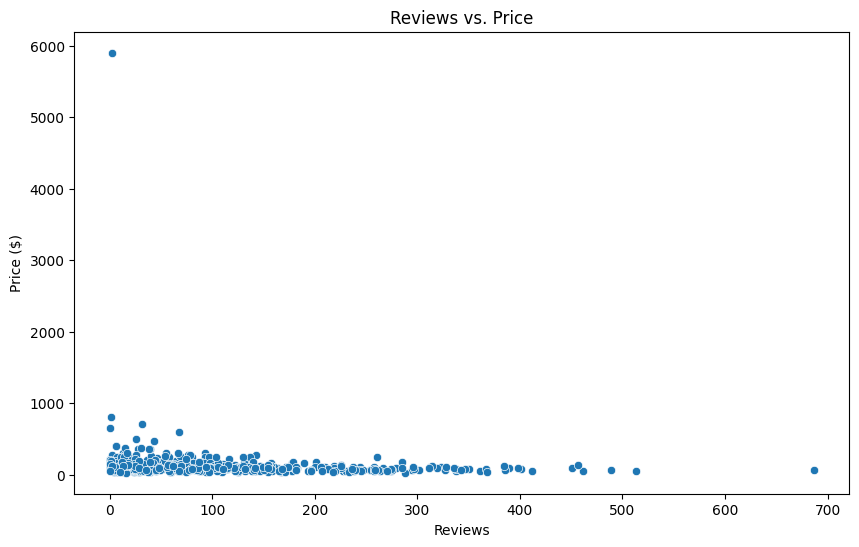

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=price, x='Reviews', y='Price')
plt.title('Reviews vs. Price')
plt.xlabel('Reviews')
plt.ylabel('Price ($)')
plt.show()

###### **Task #6.e: Scatterplot Satisfaction vs. price**

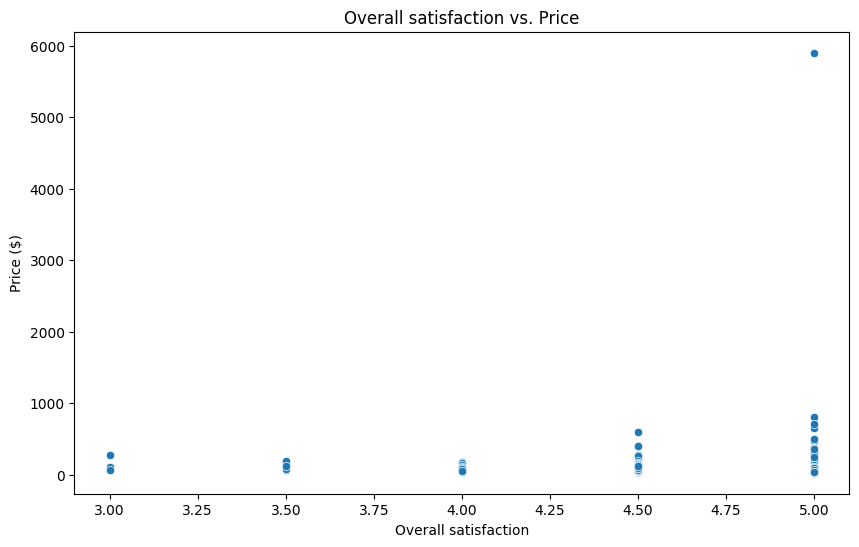

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=price, x='Overall satisfaction', y='Price')
plt.title('Overall satisfaction vs. Price')
plt.xlabel('Overall satisfaction')
plt.ylabel('Price ($)')
plt.show()

###### **Task #6.f: Barplot Cities vs. price**

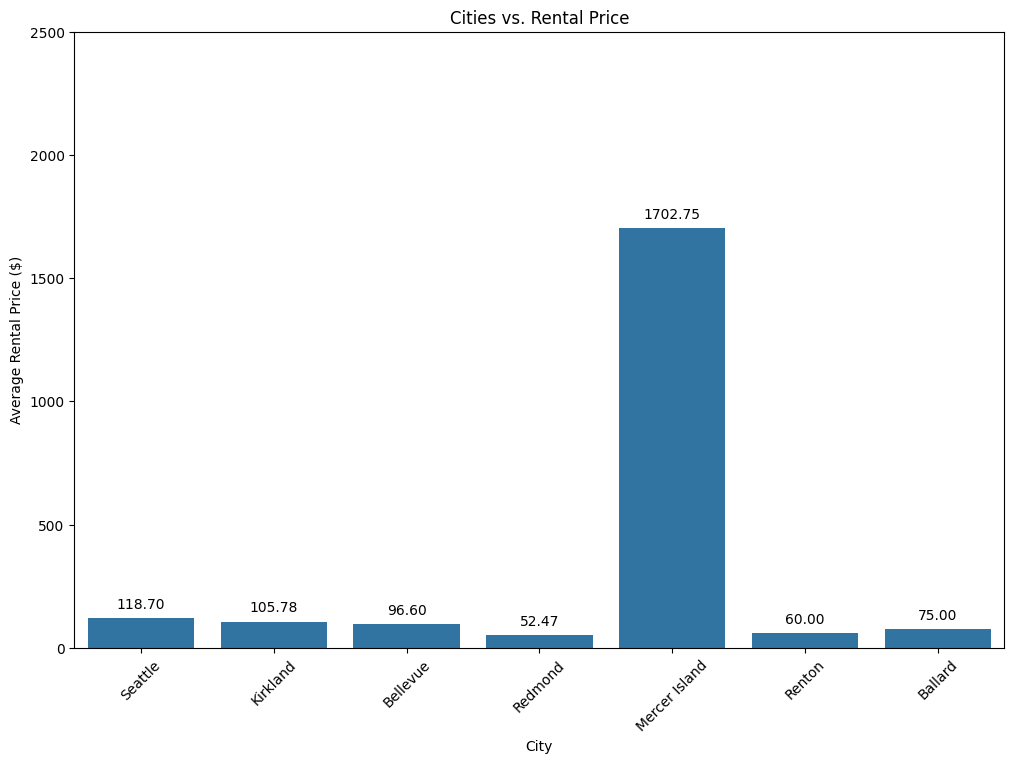

In [110]:
# Cities vs. Rental Price (Bar Plot)
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=price, x='City', y='Price',errorbar=None)
plt.title('Cities vs. Rental Price')
plt.xlabel('City')
plt.ylabel('Average Rental Price ($)')
plt.xticks(rotation=45)
ax.set_ylim(0, 2500)
# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.show()

###### **Task #6.g: Barplot Cities vs. satisfaction**

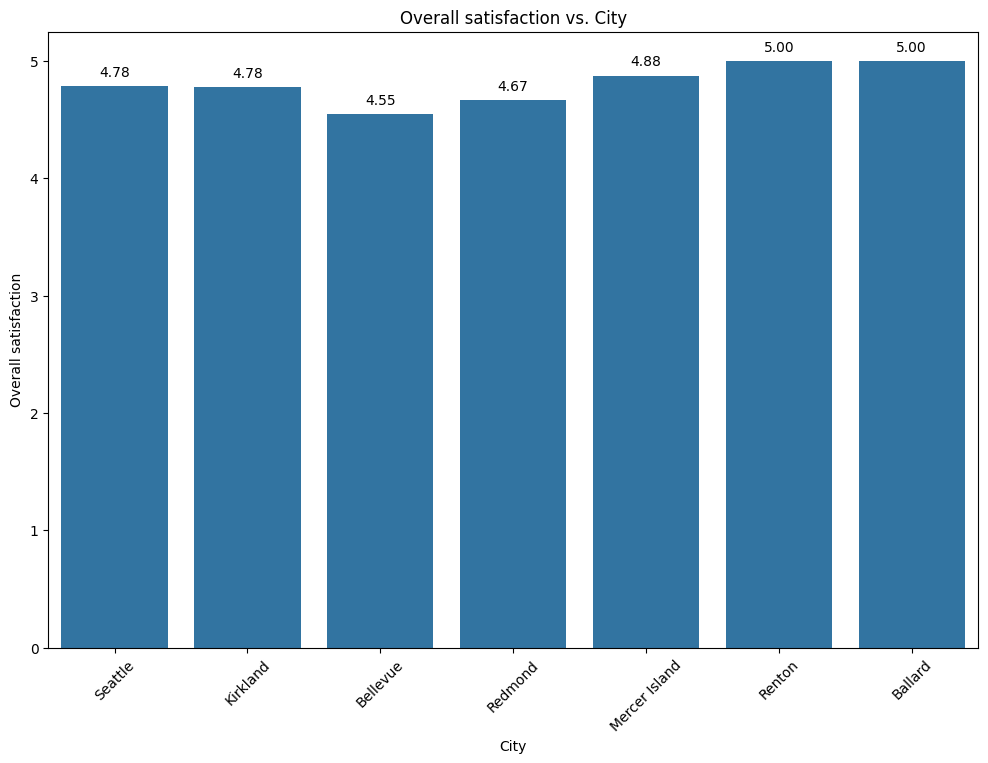

In [151]:
# Cities vs. Satisfaction (Bar Plot)
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=price, x='City', y='Overall satisfaction', errorbar=None)
plt.title('Overall satisfaction vs. City')
plt.xlabel('City')
plt.ylabel('Overall satisfaction')
plt.xticks(rotation=45)

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()


###### **Task #6.h: Plotting Longitude and Latitude on Map**

for refrence : https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

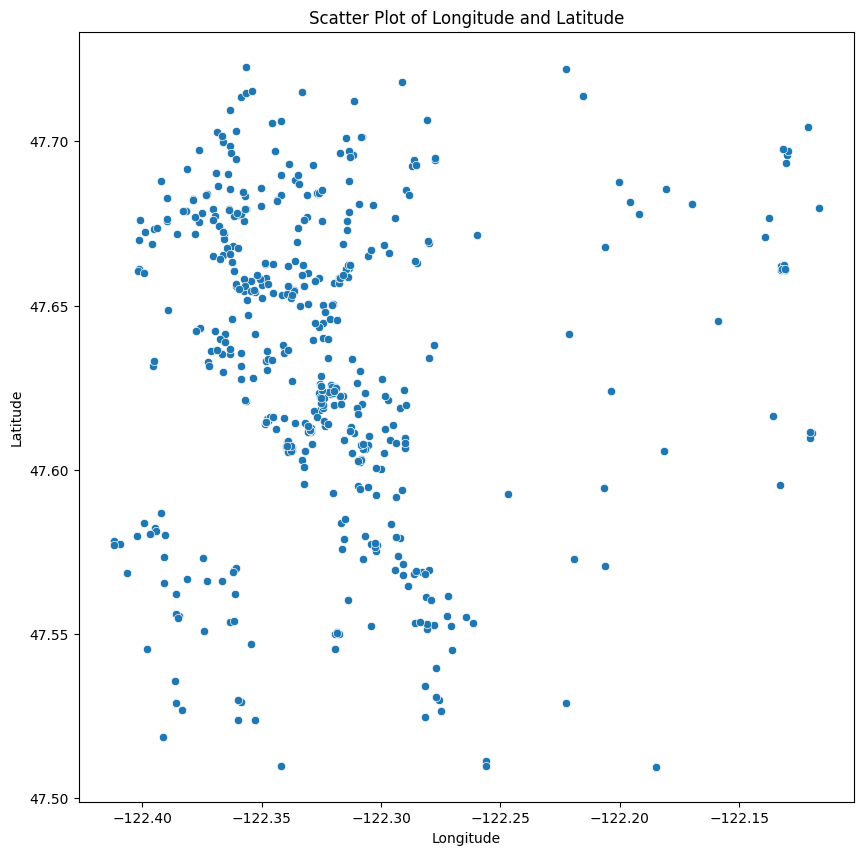

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Latitude and Longitude data
latitude = price['Latitude']
longitude = price['Longitude']

# Read the Washington, D.C. map shapefile
#world_map = gpd.read_file('/content/Washington_DC_Boundary.shp')

plt.figure(figsize=(10,10))
sns.scatterplot(x=longitude, y=latitude)
plt.title('Scatter Plot of Longitude and Latitude')
plt.show()



**I was trying to plot the ScatterPlot on Map of Washington DC but as the CRS was Not Available I was not able to plot the scatter plot using python.
I tried this in Tableau and was able to Visualize it So will include this in the IPYNB as Picture**


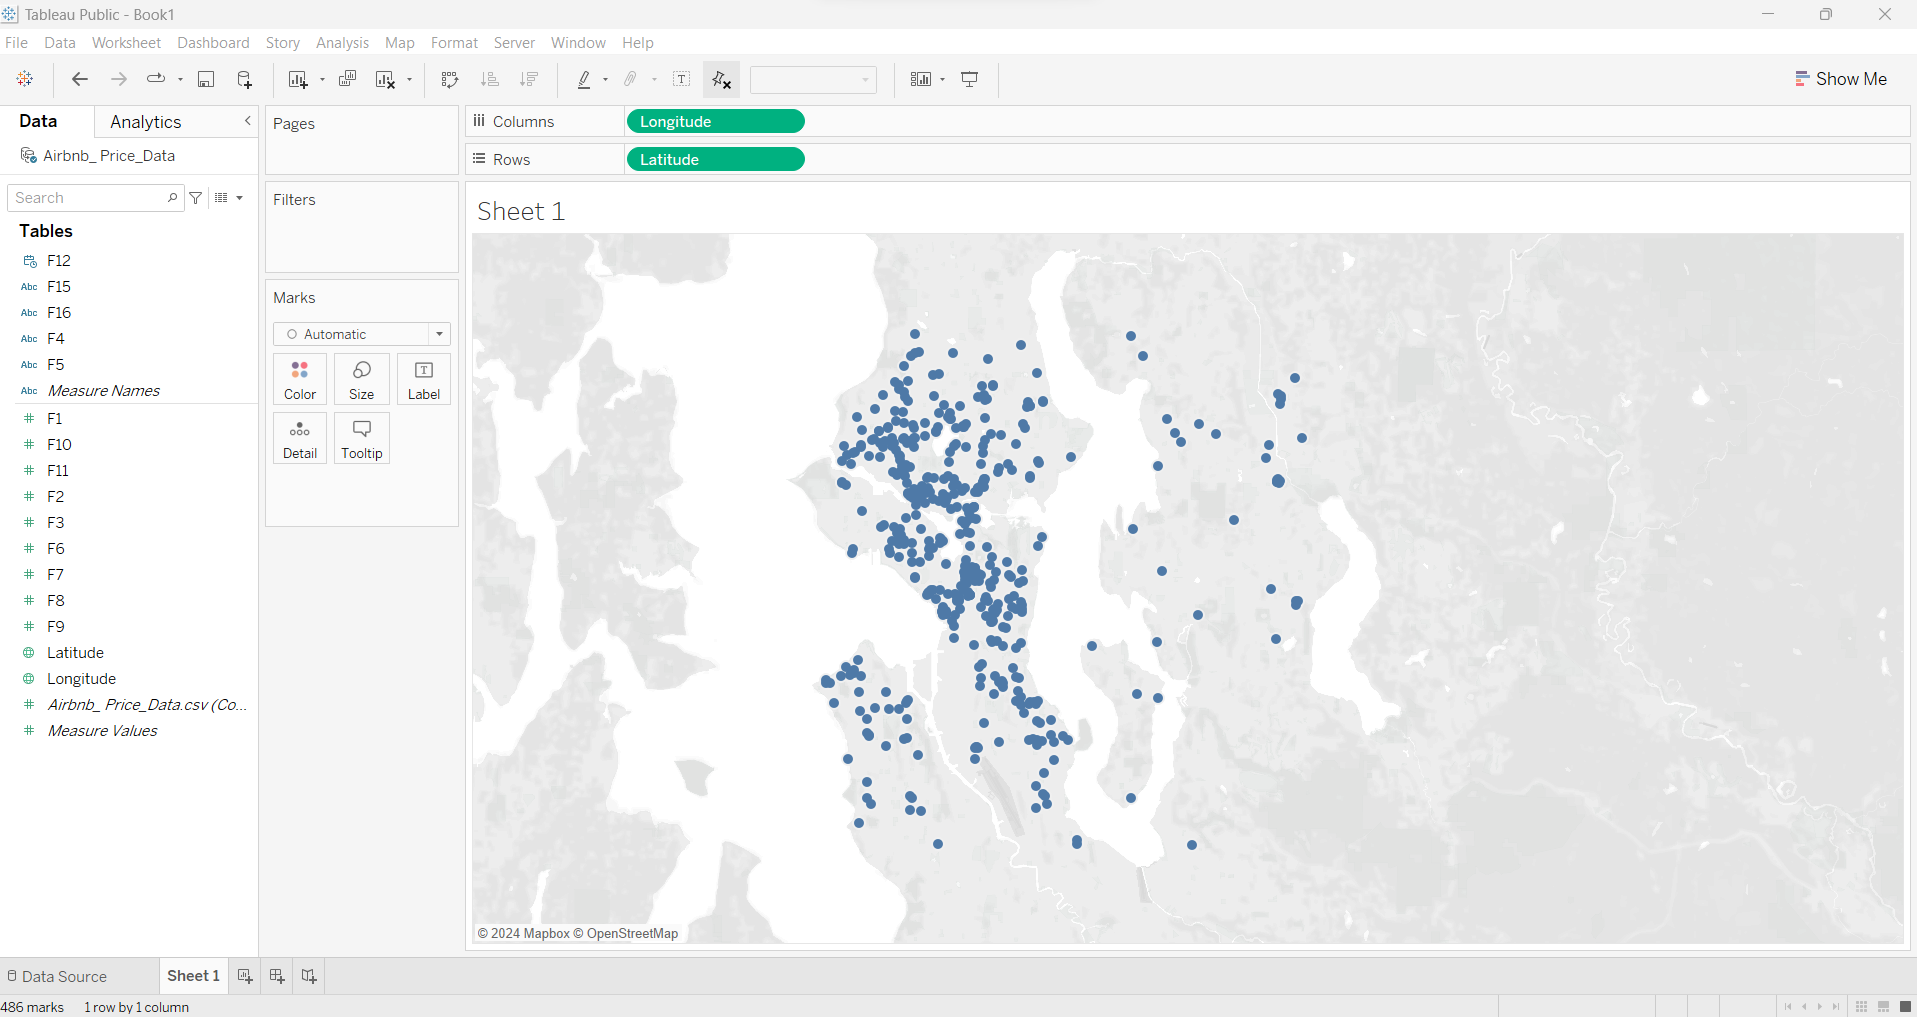

In [149]:
from PIL import Image
from IPython.display import display
img = Image.open('/content/Washington_DS.png')
display(img)

# **Task #7: Insights and observations**

**Insights and Observation in nutshell**

---


**Task #1: Read data  :**  Pandas proved to be helpfull to create a base dataframe and inbuild API in Pandas can be helpful to conver the dataframe to numpy dataframe.

---


**Task #2: Review data :**  The Provided data consist of 16 columns and 416 entries with dtypes as : float64(5), int64(6), object(5)

---


**Task #3: Adding heading :** This task was made easy with use of dataframe.columns api in pandas.

---


**Task #4: Handle missing values :**  This task was performed by using Dataframe operation with pandas which proces how flexible pandas can be.

---



**Task #5: Preliminary data analysis :**
-Average Price is 128.54 $
-The Eneumaration was performed as [1,2,3]
-Average Prices for Room type 1 is  159.7807807807808
-Average Prices for Room type 2 is 65.33962264150944
-Average Prices for Room type 3 is 70.0
-Reviews were sorted wich were greater or Euqal than 4.0 and then soreted on basis of city.
-Name of Unique Cities in Data are ['Seattle' 'Kirkland' 'Bellevue' 'Redmond' 'Mercer Island' 'Renton'
 'Ballard']

-average rental Price per city is shown Below:
Ballard            75.000000
Bellevue           96.600000
Kirkland          105.777778
Mercer Island    1702.750000
Redmond            52.466667
Renton             60.000000
Seattle           118.700873

---

**Task #6: Visualization  :**


1.   Bedroom vs Price Graph shows that as the number of bedroom increases the price also increases
2.   Accommodates vs Price Graph shows that Mamimum number of accommodates is 16 while the number is high the price is significantly low compared to accommodate within range 10 - 12
3.   Roomtype Vs Price graph shows that the price of entire home is high as compared to private or shared room. Another finding is that the price of Private and Shared rooms are similar atleast on graph.
4.   Reviews vs Price graph doesnt provide us with insights as the reviews are fairly spreaded and range from low to high but one thing can be noted the higher reviews concluded higher price.
5.   Satisfaction vs price graph points that the statisfiction rubrics is fairly distributed but towards higer end. Most Airbnb have 4-5 stars rating with 4.5% of shift (Adjusted Values of NaN).
6.   City vs Statisfiction and price shows that Mercer Island is higher in price while Redmond is lower in price while such trend are found the statisfiction graph tends that  all cities have higher statisfiction but Renton and Ballard have highest statisfiction rate.




In [ ]:
```python
"""
Summary Analysis

---

# Task #1: Read data:
# - Utilized Pandas to establish a base dataframe, demonstrating its efficacy in data manipulation.
# - Leveraged Pandas' built-in APIs for seamless conversion of the dataframe to a NumPy array.

---

# Task #2: Review data:
# - The provided dataset comprises 16 columns and 416 entries, encompassing various data types: float64(5), int64(6), and object(5).

---

# Task #3: Adding heading:
# - Employed the `dataframe.columns` API in Pandas, simplifying the task of adding headings to the dataset.

---

# Task #4: Handle missing values:
# - Employed Pandas' dataframe operations to effectively manage missing data, showcasing the flexibility and robustness of the library.

---

# Task #5: Preliminary data analysis:
# - Average price across the dataset is $128.54.
# - Enumeration was conducted resulting in [1, 2, 3].
# - Average prices for room types were computed, revealing variations across different room types.
# - Reviews with ratings greater than or equal to 4.0 were sorted, providing insights into higher-rated listings.
# - Identified unique cities in the dataset, including Seattle, Kirkland, Bellevue, Redmond, Mercer Island, Renton, and Ballard.
# - Average rental price per city was calculated, highlighting variations in rental prices across different cities.

---

# Task #6: Visualization:
# 1. Graphical analysis showcased trends between bedroom count and price, revealing an increase in price with the number of bedrooms.
# 2. Accommodates vs. Price graph indicated a pricing trend with accommodation capacity, with maximum accommodation at 16 but a significant price reduction beyond a range of 10-12.
# 3. Room type vs. Price graph illustrated pricing disparities among entire homes, private rooms, and shared rooms, with entire homes commanding higher prices.
# 4. Reviews vs. Price graph demonstrated a varied distribution of reviews with price, indicating a general trend of higher-priced listings correlating with higher reviews.
# 5. Satisfaction vs. Price graph suggested a broad distribution of satisfaction ratings, with a predominant concentration towards higher satisfaction levels.
# 6. City vs. Satisfaction and Price graph delineated price discrepancies among cities, with Mercer Island registering higher prices and Redmond lower prices, while satisfaction rates remained generally high across all cities, particularly in Renton and Ballard.

---

This summary provides a comprehensive overview of the insights and observations gleaned from the dataset analysis, highlighting key findings and trends across various analytical tasks.
"""
```